# National Park Service API in Python

by Nathaniel Pedigo and Michael T. Moen

**NPS API documentation:** [https://www.nps.gov/subjects/developer/api-documentation.htm](https://www.nps.gov/subjects/developer/api-documentation.htm)

**NPS API terms of use and disclaimer:** [https://www.nps.gov/aboutus/disclaimer.htm](https://www.nps.gov/aboutus/disclaimer.htm):

- "All sample data and information is attributed to National Park Service via the API service, no protection is claimed in original U.S. Government works."

This API is managed by the National Park Service (NPS) of the United States of America. It contains pertinent information about the national parks, monuments, and other sites managed by the NPS. This API is free to use with an API key.

*These recipe examples were tested on October 18, 2024.*

**_NOTE:_** The National Park Service API limits requests to a maximum of 1000 requests per hour: https://www.nps.gov/subjects/developer/guides.htm

## Setup

### API Key

An API key is required to access the National Park Service API. Sign up can be found here: [https://www.nps.gov/subjects/developer/get-started.htm](https://www.nps.gov/subjects/developer/get-started.htm)

We start by importing our API key below:

In [3]:
from api_key import key

### Import Libraries

First step is to import the necessary libraries. We will be using the `requests` library to make the API calls, the `matplotlib` library to create data visualizations, and the 'numpy' library to assist in the creation of the data visualizations. If you are more familiar with Python and would prefer a different method of data visualization, feel free to use that instead. Additionally, as the API returns data in JSON format, we will be using the `json` library to parse the data.

In [4]:
import requests
import matplotlib.pyplot as plt
from time import sleep
from pprint import pprint

## 1. Find the NPS Parks in a State

Count the number of National Park Service parks in Alabama.

We use the following parameters in our API query:
- `stateCode` specifies the two letter code of the state being used as a filter. Note that the codes for U.S. territories can also be used (e.g. `DC` for the District of Columbia and `MP` for the Northern Mariana Islands).
- `limit` specifies the maximum number of results to return in a request. It is set to 50 by default.

The NPS API allows for a number of parameters to be specified, including the state, the type of site, and the number of results returned. For this example, we will be using the state of Alabama, the type of site as national parks, and the maximum number of results returned as 200. 

In [68]:
state = "AL"
limit = 200

endpoint = "parks"
params = {
    "stateCode": state,
    "limit": limit,
    "api_key": key
}

url = f"https://developer.nps.gov/api/v1/{endpoint}"

Next, we use `requests.get()` to make the API call:

In [69]:
response = requests.get(url, params=params)

First, we must check that the request was performed successfully. The `status_code` field of the response can give us insight into any errors that may occur. The request returns a JSON object, which we can parse using the `json()` function.

In [70]:
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Print the first level of the JSON response
    pprint(data, depth=1)
else:
    # Print an error message if the request was not successful
    print(f"Error: {response.status_code}, {response.text}")

{'data': [...], 'limit': '200', 'start': '0', 'total': '11'}


Finally, we can print our result:

In [71]:
print(f"The number of NPS managed lands in {state} is {data["total"]}.")

The number of NPS managed lands in AL is 11.


Note that none of the parks returned are National Parks, but other designations. See the [National Park Service website](https://www.nps.gov/aboutus/national-park-system.htm) to learn more about these designations.

In [72]:
print(f"{"Park Name":<45} Designation\n")
for park in data["data"]:
    print(f"{park["fullName"]:<45} {park["designation"]}")

Park Name                                     Designation

Birmingham Civil Rights National Monument     National Monument
Freedom Riders National Monument              National Monument
Horseshoe Bend National Military Park         National Military Park
Little River Canyon National Preserve         National Preserve
Natchez Trace National Scenic Trail           National Scenic Trail
Natchez Trace Parkway                         Parkway
Russell Cave National Monument                National Monument
Selma To Montgomery National Historic Trail   National Historic Trail
Trail Of Tears National Historic Trail        National Historic Trail
Tuskegee Airmen National Historic Site        National Historic Site
Tuskegee Institute National Historic Site     National Historic Site


## 2. Finding the Number of Parking Lots Created by NPS Entities by State

In this example, we look at the number of "parking lots created by national parks and other NPS entities" by state using the `parkinglots` endpoint:

In [52]:
# URL for Alabama
url = f"https://developer.nps.gov/api/v1/parkinglots?stateCode=AL&limit=200&api_key={key}"
response = requests.get(url)

pprint(response.json(), depth=1)

{'data': [...], 'limit': '200', 'start': '0', 'total': '17'}


Next, we'll loop through each state to find the total number of parking lots for each:

In [53]:
# Create a list of all state abbreviations in the United States
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

# Create an empty dictionary to store the total number of parking lots per state
parking_lots = {}

for state in states:

    url = f"https://developer.nps.gov/api/v1/parkinglots?stateCode={state}&limit=200&api_key={key}"
    response = requests.get(url)

    # Extract the total number of NPS parking lots in the state
    total = int(response.json()["total"])

    # Add the total to the parking_lots list
    parking_lots[state] = total

    # Delay for some period between between API calls
    sleep(0.75)

In [54]:
# Create a list of the top 5 states with the most parking lots using
states_sorted = sorted(parking_lots.items(), key=lambda item: item[1], reverse=True)

In [55]:
print("Top 5 States by NPS Parking Lots:")
for state in states_sorted[:5]:
    print(f"{state[0]}: {state[1]}")

Top 5 States by NPS Parking Lots:
CA: 59
GA: 50
AZ: 43
VA: 42
FL: 34


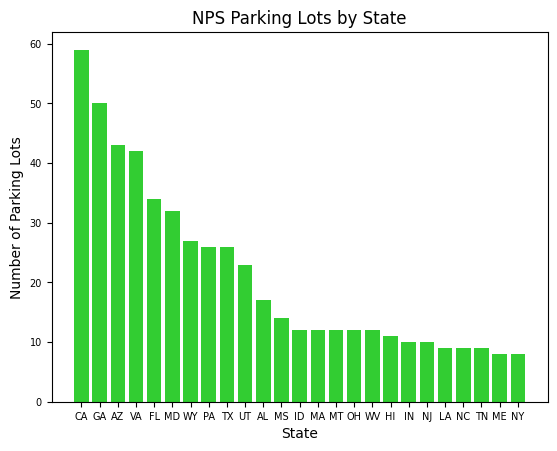

In [56]:
# Extract keys and values for plotting
states_top25 = [state[0] for state in states_sorted[:25]]
values_top25 = [state[1] for state in states_sorted[:25]]

# Create a bar chart
plt.bar(states_top25, values_top25, color='limegreen')
plt.title("NPS Parking Lots by State")
plt.xlabel("State")
plt.ylabel("Number of Parking Lots")
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

## 3. Finding Campground Addresses

Prompt the user for a State, then a selection of the parks in that state, and return the addresses of all campgrounds in the park.

In [74]:
state = ""

# Prompt user for a state code using the states list from Section 2
while state not in states:
    state = input("Enter a valid state code: ")

# Perform the API call
endpoint = f"https://developer.nps.gov/api/v1/parks?stateCode={state}&limit=150&api_key={key}"
response = requests.get(endpoint)

# Offer user a selection from available parks within specified state
if response.status_code == 200:

    parks = response.json()["data"]
    park_names = [park["fullName"] for park in parks]
    park_codes = [park["parkCode"] for park in parks]

    print(f"Available NPS managed lands in {state}:")
    for i, park_name in enumerate(park_names):
        print(f"{i+1}. {park_name}")

Available NPS managed lands in WY:
1. Bighorn Canyon National Recreation Area
2. California National Historic Trail
3. Devils Tower National Monument
4. Fort Laramie National Historic Site
5. Fossil Butte National Monument
6. Grand Teton National Park
7. Mormon Pioneer National Historic Trail
8. Oregon National Historic Trail
9. Pony Express National Historic Trail
10. Yellowstone National Park


In [75]:
# Prompt to pick a park
park_choice = 0
while (park_choice < 1) or (park_choice > len(park_names)):
    park_choice = int(input(f"Enter the number of the park you would like to explore (1-{len(park_names)}): "))

# Get the park code for the selected park
park_code = park_codes[park_choice-1]
park_name = park_names[park_choice-1]

# Create the endpoint URL with the park code
endpoint = f"https://developer.nps.gov/api/v1/campgrounds?parkCode={park_code}&api_key={key}"

# Perform the API call
response = requests.get(endpoint)

# Extract the total number of campgrounds in the park
if response.status_code == 200:
    data = response.json()
    
    campgrounds = data["data"]
    total = data["total"]

    print(f"There are {total} campgrounds in {park_name}.")

    # Print the names and addresses of the campgrounds
    if int(total) > 0:
        for campground in campgrounds:
            print(f"\nName: {campground['name']}")
            
            for address in campground["addresses"]:
                if address["type"] == "Physical":
                    print(f"Address: {address['line1']} {address['city']}, {address['stateCode']} {address['postalCode']}")

There are 12 campgrounds in Yellowstone National Park.

Name: Bridge Bay Campground
Address: GPS Coordinates: N 44 32.070 W 110 26.218 Yellowstone National Park, WY 82190

Name: Canyon Campground
Address: GPS Coordinates: N 44 44.118 W110 29 17 Yellowstone National Park, WY 82190

Name: Fishing Bridge RV Park
Address: GPS Coordinates: N 44 33.820 W 110 22.167 Yellowstone National Park, WY 82190

Name: Grant Village Campground
Address: GPS Coordinates-- N 44 23.610 W 110 33.769 Yellowstone National Park, WY 82190

Name: Indian Creek Campground
Address: GPS Coordinates--N: 44  53.22138 W: 110 44.16414 Yellowstone National Park, WY 82190

Name: Lewis Lake Campground
Address: GPS Coordinates-- N 44.2822056, W -110.6279873 Yellowstone National Park, WY 82190

Name: Madison Campground
Address: N 44 38.725 W 110 51.687 Yellowstone National Park, WY 82190

Name: Mammoth Campground
Address: GPS Coordinates N 44 58.4166 W 110.41.59392 Yellowstone National Park, WY 82190

Name: Norris Campground


## 4. Finding Locations with Restrooms within a Park

Prompt the user for a state, then a selection of the parks in that state, and return the names of all locations in the park that are listed as having restrooms as an amenity.

In [76]:
state = ""

# Prompt user for a state code
while state not in states:
    state = input("Enter a valid state code: ")

# Create the endpoint URL with the state code
endpoint = f"https://developer.nps.gov/api/v1/parks?stateCode={state}&limit=50&api_key={key}"

# Perform the API call
response = requests.get(endpoint)

# Offer user a selection from available parks within specified state
if response.status_code == 200:
    data = response.json()
    parks = data["data"]
    park_names = [park["fullName"] for park in parks]
    park_codes = [park["parkCode"] for park in parks]
    print("Available NPS managed lands in the specified state:")
    for i, park_name in enumerate(park_names):
        print(f"{i+1}. {park_name}")

Available NPS managed lands in the specified state:
1. Butterfield Overland National Historic Trail
2. California National Historic Trail
3. Gateway Arch National Park
4. George Washington Carver National Monument
5. Harry S Truman National Historic Site
6. Lewis & Clark National Historic Trail
7. Oregon National Historic Trail
8. Ozark National Scenic Riverways
9. Pony Express National Historic Trail
10. Santa Fe National Historic Trail
11. Ste. Geneviève National Historical Park
12. Trail Of Tears National Historic Trail
13. Ulysses S Grant National Historic Site
14. Wilson's Creek National Battlefield


In [82]:
# Prompt to pick a park
park_choice = 0
while (park_choice < 1) or (park_choice > len(park_names)):
    park_choice = int(input(f"Enter the number of the park you would like to explore (1-{len(park_names)}): "))

# Get the park code for the selected park
park_code = park_codes[park_choice-1]
park_name = park_names[park_choice-1]

# Create the endpoint URL with the park code
endpoint = f"https://developer.nps.gov/api/v1/places?parkCode={park_code}&api_key={key}"

# Perform the API call
response = requests.get(endpoint)

# Extract all locations in the park
data = response.json()

if(data["total"] == 0):
    print(f"There are no locations in {park_name}.")
else:
    cell_locations = []

    for location in data["data"]:
        if "Restroom" in location["amenities"]:
            cell_locations.append(location["title"])

    if cell_locations:
        print(f"The following locations in {park_name} have restrooms:\n")
        for location in cell_locations:
            print(location)
    else:
        print(f"There are no locations in {park_name} with restrooms.")

The following locations in Ulysses S Grant National Historic Site have restrooms:

Grant's Farm
Jefferson Barracks
Thomas Sappington House Museum
White Haven
